### Read In Data

In [1]:
# Read in the data from the data folder
# Read in our data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the number of rows and columns in the data
titanic.shape

(891, 12)

In [3]:
# Check the type of data stored in each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Analysis

In [4]:
# See the distribution of our target variable
# to check whether the data is biased or not 
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
tit_cat = titanic.drop(cat_feat, axis=1)
tit_cat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [6]:
# Look at the general distribution of these features
tit_cat.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


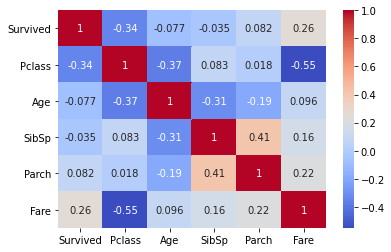

In [7]:
# Look at the correlation matrix
sns.heatmap(tit_cat.corr(),annot=True,cmap='coolwarm')

In [8]:
# Look at fare by different passenger class levels
tit_cat.groupby('Pclass')['Fare'].describe()
# Here there is a clear correlation in class and fare,i.e., the fare division based on class

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


The t-value measures the size of the difference relative to the variation in your sample data.The greater the magnitude of T, the greater the evidence against the null hypothesis of identical average scores.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.


In [9]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(tit_cat.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = tit_cat[titanic['Survived']==1][feature]
    not_survived = tit_cat[titanic['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [10]:
# Look at the distribution of each feature at each level of the target variable
from scipy import stats
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

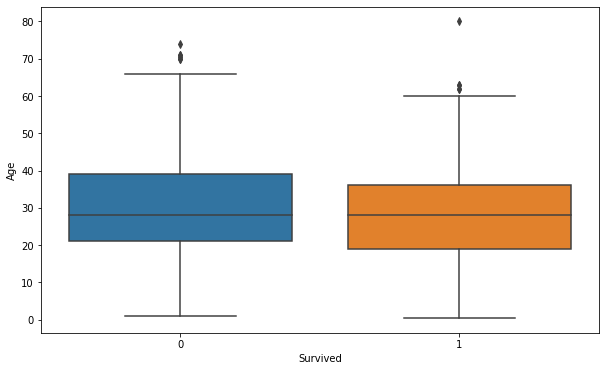

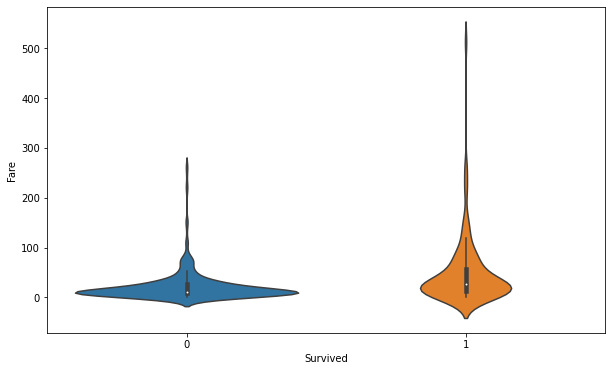

In [11]:
plt.figure(figsize= (10,6))
sns.boxplot(x='Survived' ,y='Age', data = tit_cat)
plt.figure(figsize= (10,6))
sns.violinplot(x='Survived' ,y='Fare', data = tit_cat)

In [12]:
# Look at the average value of each feature based on whether Age is missing
tit_cat.groupby(titanic['Age'].isnull()).mean()
# we can see that missing population has 11% lesser survival rate

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


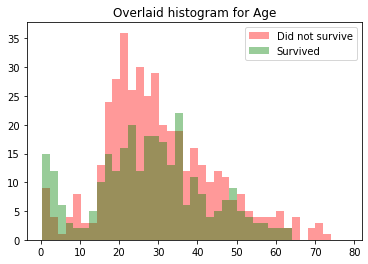

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


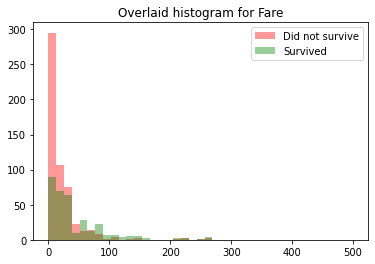

In [13]:
# Plot overlaid histograms for continuous features
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

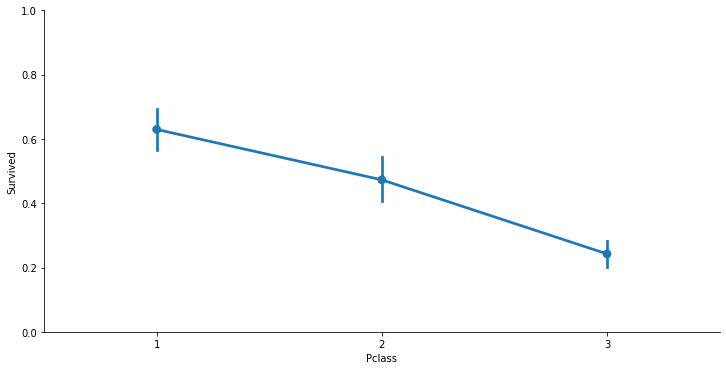

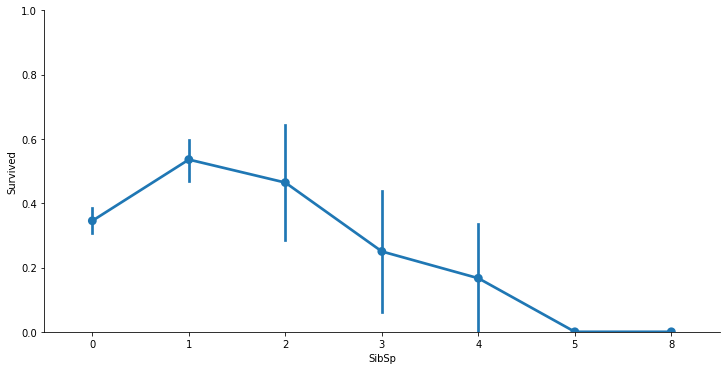

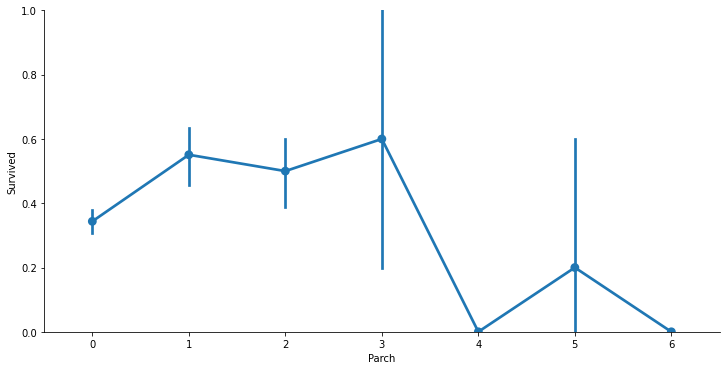

In [14]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

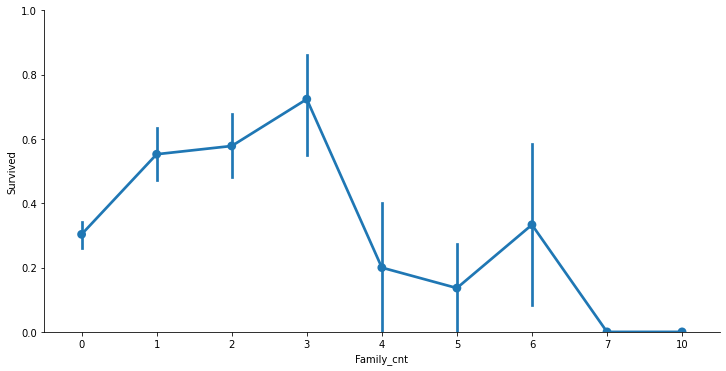

In [15]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

In [16]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
tit_cont = titanic.drop(cont_feat, axis=1)
tit_cont.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Family_cnt
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,0


In [17]:
# Check if there are any missing values
tit_cont.isnull().sum()

Survived        0
Name            0
Sex             0
Ticket          0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [18]:
# Explore the number of unique values for each feature
for col in tit_cont.columns:
    print('{}: {} unique values'.format(col, tit_cont[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values
Family_cnt: 9 unique values


In [19]:
# Check survival rate by gender
tit_cont.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [20]:
# Check survival rate by the port departed from
tit_cont.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [21]:
# Is Cabin missing at random?
tit_cont.groupby(tit_cont['Cabin'].isnull())['Survived'].mean()
# NO not at random

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [22]:
# Look at unique values for the Ticket feature
tit_cont['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
CA 2144              6
347088               6
                    ..
PC 17609             1
STON/O 2. 3101274    1
C.A. 24580           1
347068               1
239856               1
Name: Ticket, Length: 681, dtype: int64

In [23]:
# Create a title feature by parsing passenger name
tit_cont['Title'] = tit_cont['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
tit_cont.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Family_cnt,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,1,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,0,Mr


In [24]:
# Look at survival rate by title
tit_cont.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [25]:
usecols=['Survived', 'Name', 'Sex', 'Cabin', 'Embarked']

## Plot Categorical Features

In [26]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
tit_Title = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = tit_Title.apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0


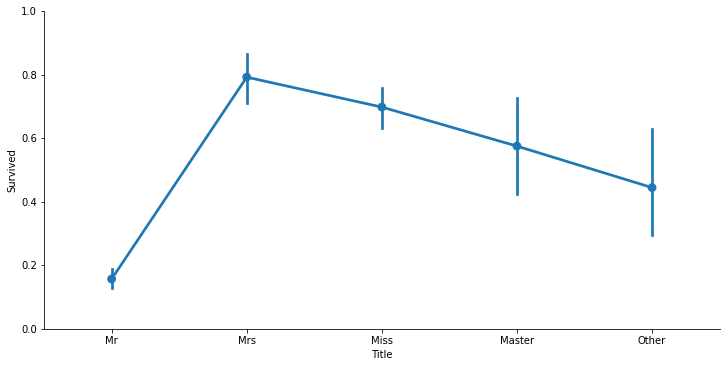

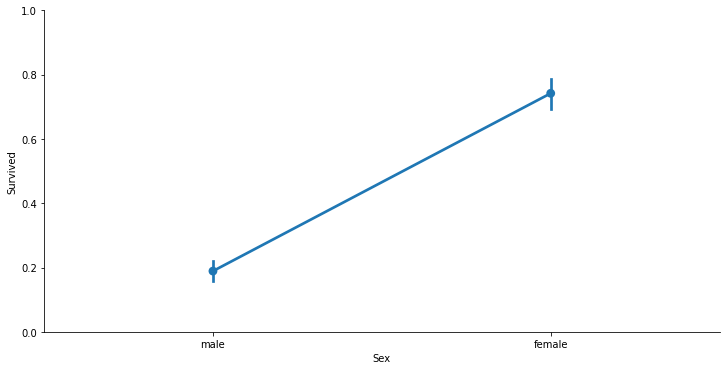

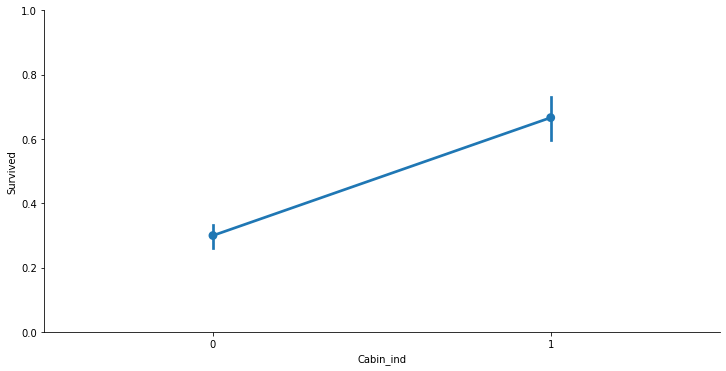

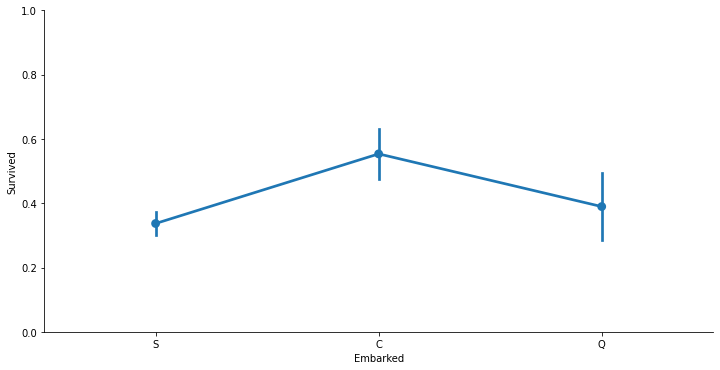

In [27]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2 )
    plt.ylim(0, 1)

In [28]:
# Split embarked by whether the passenger is female
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')
# there are relatively more people who are female in C => higher surivival of C

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [29]:
# Split embarked by whether the passenger had a cabin
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')
# there are more people who have cabin for C => higher surivival of C

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


# Fill Missing For `Age` and 'Embarked'

In [30]:
# Fill in missing values for the Age feature
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_cnt       0
Title            0
Cabin_ind        0
dtype: int64

In [31]:
# Take a look at the data one more time
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,Mr,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0,Mr,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2,Mrs,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1,Mrs,0


In [32]:
# Fill in missing values for the Embarked feature
titanic['Embarked'] = titanic['Embarked'].fillna('O')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_cnt       0
Title            0
Cabin_ind        0
dtype: int64

# Remove Outliers and unnecessary features

In [33]:
# See where outliers might be an issue
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_cnt,Cabin_ind
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.228956
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [34]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [35]:
# Determine what the upperbound should be for continuous features
for feat in ['Age', 'Family_cnt', 'Fare']:
    detect_outlier(feat)


Outlier caps for Age:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 7 values exceed that
  --99p: 65.0 / 8 values exceed that

Outlier caps for Family_cnt:
  --95p: 5.0 / 25 values exceed that
  --3sd: 5.7 / 25 values exceed that
  --99p: 7.0 / 7 values exceed that

Outlier caps for Fare:
  --95p: 112.1 / 45 values exceed that
  --3sd: 181.2 / 20 values exceed that
  --99p: 249.0 / 9 values exceed that


In [36]:
# Cap features
titanic['Age'].clip(upper=titanic['Age'].quantile(.99), inplace=True)
titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99), inplace=True)
titanic['Family_cnt'].clip(upper=titanic['Family_cnt'].quantile(.99), inplace=True)

In [37]:
# Describe the dataframe again to make sure the capping was successful
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_cnt,Cabin_ind
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.640195,0.523008,0.381594,31.224767,0.881033,0.228956
std,257.353842,0.486592,0.836071,12.820616,1.102743,0.806057,42.524125,1.498085,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,65.000000,8.000000,6.000000,249.006220,7.000000,1.000000


In [38]:
titanic.drop(['SibSp','Parch','Name','Embarked','Ticket','Cabin'],1,inplace=True)

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family_cnt,Title,Cabin_ind
0,1,0,3,male,22.0,7.2500,1,Mr,0
1,2,1,1,female,38.0,71.2833,1,Mrs,1
2,3,1,3,female,26.0,7.9250,0,Miss,0
3,4,1,1,female,35.0,53.1000,1,Mrs,1
4,5,0,3,male,35.0,8.0500,0,Mr,0


In [40]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Family_cnt     0
Title          0
Cabin_ind      0
dtype: int64

# Transform Skewed Features

In [41]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


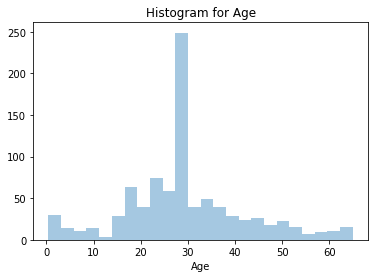

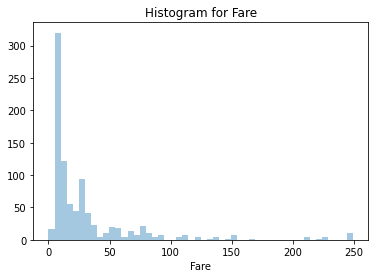

In [42]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['Age', 'Fare']:
    sns.distplot(titanic[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

# it is not required for age

### Box-Cox Power Transformation

**Base Form** $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

**Example (Using Fare)**

| Original value    | Transformation           |           Transformation               |
|------|--------------------------|--------------------------|
| $$ 50 $$    | $$ \frac{1}{50^2} $$           |  $$ 0.0004 $$      |
| $$ 50 $$    | $$ \frac{1}{50} $$          | $$ 0.02 $$        |
| $$ 50 $$  | $$ \frac{1}{\sqrt{50}} $$ | $$ 0.14 $$ |
| $$ 50 $$     | $$ log(50) $$              | $$ 1.7 $$             |
| $$ 50 $$   | $$ \sqrt{50} $$ | $$ 7.07 $$           |
| $$ 50 $$     | $$ 50 $$              | $$ 50 $$                  |
| $$ 50 $$     | $$ 50^2 $$           | $$ 2500 $$                |

**Process**

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

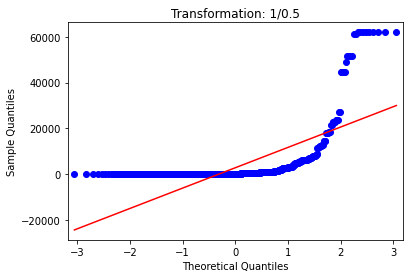

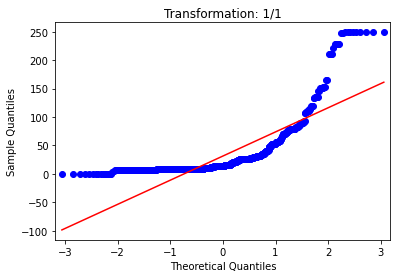

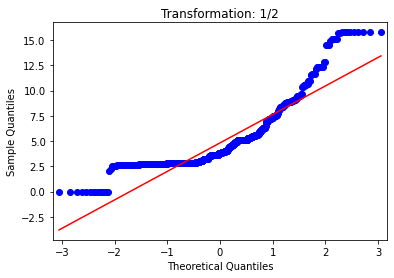

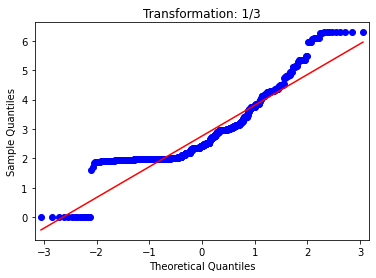

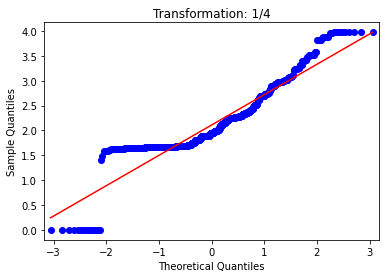

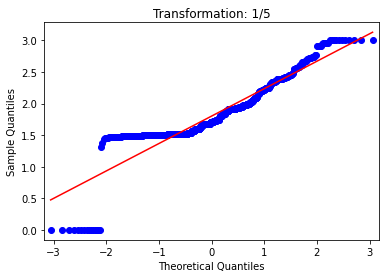

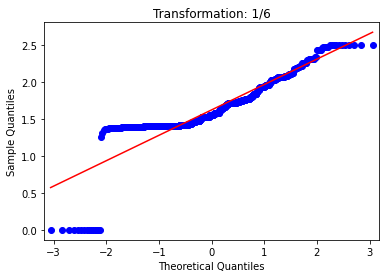

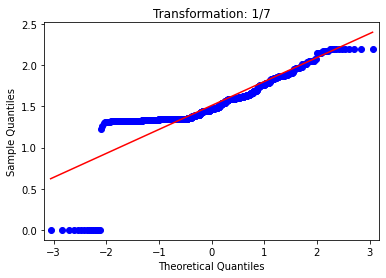

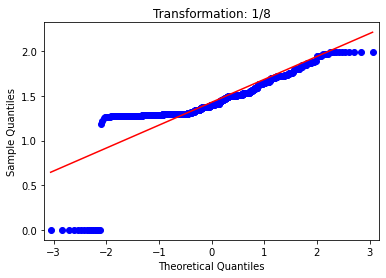

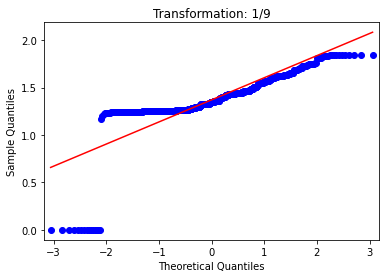

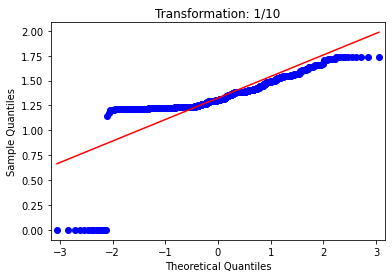

In [43]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

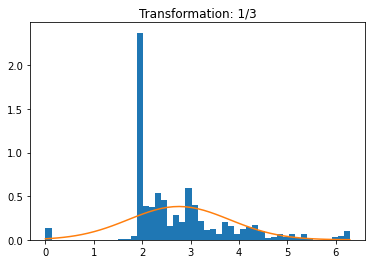

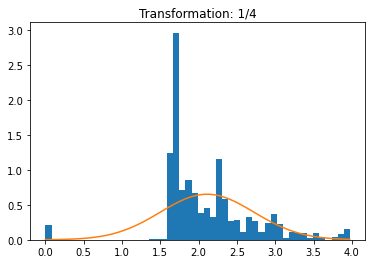

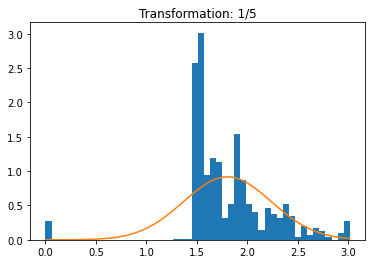

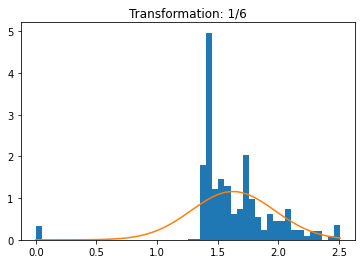

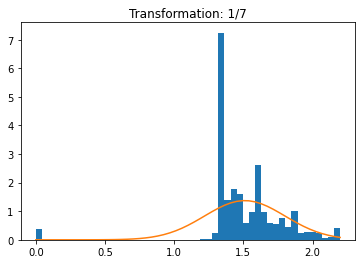

In [44]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = titanic['Fare']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [45]:
# Create the new transformed feature
titanic['Fare']=titanic['Fare'].apply(lambda x: x**(1/5))
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family_cnt,Title,Cabin_ind
0,1,0,3,male,22.0,1.486167,1,Mr,0
1,2,1,1,female,38.0,2.347457,1,Mrs,1
2,3,1,3,female,26.0,1.512864,0,Miss,0
3,4,1,1,female,35.0,2.213191,1,Mrs,1
4,5,0,3,male,35.0,1.517606,0,Mr,0


#Convert Categorical Features To Numeric

In [46]:
# Convert categorical features to numeric levels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'].astype(str))


dummies_creation


In [47]:
Pclass = pd.get_dummies(titanic['Pclass'],drop_first = True)
Title = pd.get_dummies(titanic['Title'],drop_first = True)
titanic.drop(['Pclass','Title'],axis=1,inplace =True)
titanic.head()

,PassengerId,Survived,Sex,Age,Fare,Family_cnt,Cabin_ind
0,1,0,1,22.0,1.486167,1,0
1,2,1,0,38.0,2.347457,1,1
2,3,1,0,26.0,1.512864,0,0
3,4,1,0,35.0,2.213191,1,1
4,5,0,1,35.0,1.517606,0,0


In [48]:
titanic = pd.concat([titanic,Pclass,Title],axis=1)

In [49]:
titanic.head()

,PassengerId,Survived,Sex,Age,Fare,Family_cnt,Cabin_ind,2,3,Miss,Mr,Mrs,Other
0,1,0,1,22.0,1.486167,1,0,0,1,0,1,0,0
1,2,1,0,38.0,2.347457,1,1,0,0,0,0,1,0
2,3,1,0,26.0,1.512864,0,0,0,1,1,0,0,0
3,4,1,0,35.0,2.213191,1,1,0,0,0,0,1,0
4,5,0,1,35.0,1.517606,0,0,0,1,0,1,0,0


In [50]:
titanic.to_csv('taitanic_cleaned.csv',index = False)

In [52]:
titanic.drop(['Miss','Mr','Mrs','Other'],axis =1).to_csv('taitanic_cleaned_req.csv',index = False)